
## Oleh Muhammad Rosyid Suseno

##Image Detection Menggunakan Template Matching

## Math Equation
#### Correlation
Persamaan korelasi satu dimensi dari dua fungsi $f(t)$ dan $g(t)$:

\begin{equation}
(f \star g)(\tau) = \int_{-\infty}^{\infty} f(t) \, g(t+\tau) \, dt
\end{equation}

Persamaan korelasi dua dimensi dari dua fungsi $f(x, y)$ dan $g(x, y)$:

\begin{equation}
(f \star g)(\xi, \eta) = \iint_{-\infty}^{\infty} f(x, y) \, g(x-\xi, y-\eta) \, dx \, dy
\end{equation}



In [1]:
from skimage.io import imread, imshow
from skimage.feature import match_template
from skimage.feature import peak_local_max
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
import matplotlib.pyplot as plt
import numpy as np
import cv2

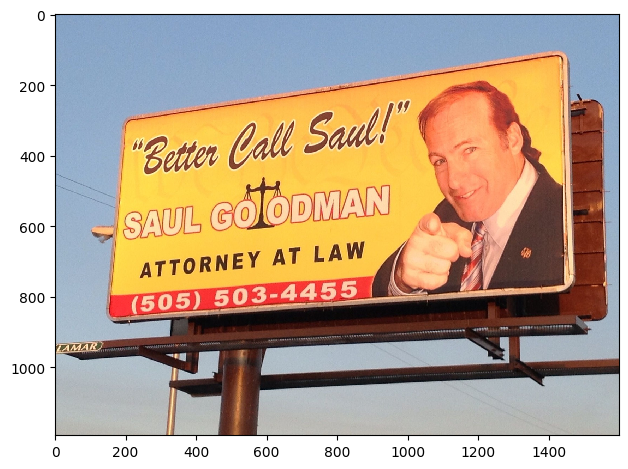

In [2]:
image1 = imread('saul-ori.jpeg')
imshow(image1);

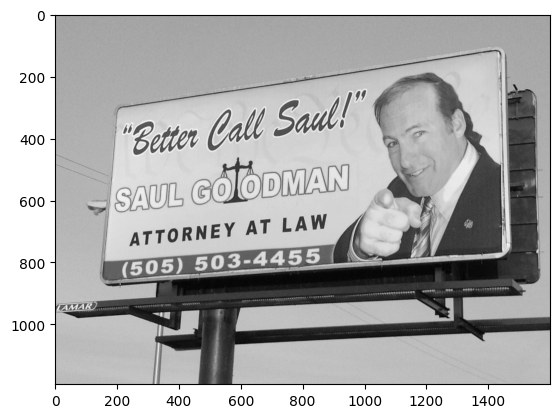

In [3]:
image_grey = rgb2gray(image1)
plt.imshow(image_grey, cmap='gray');

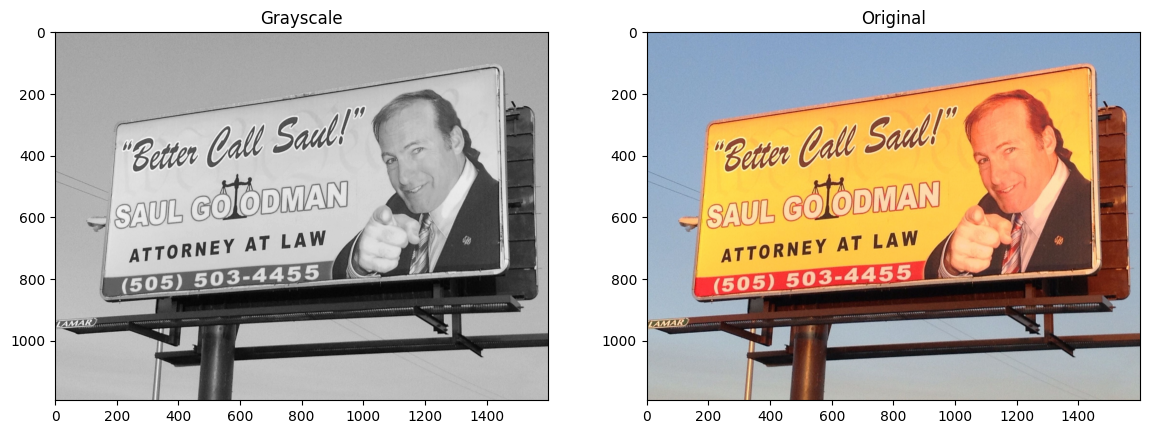

In [4]:
plt.figure(figsize = (14, 12))
plt.subplot(121)
plt.title('Grayscale')
plt.imshow(image_grey, cmap = 'gray')
plt.subplot(122)
plt.title('Original')
plt.imshow(image1)

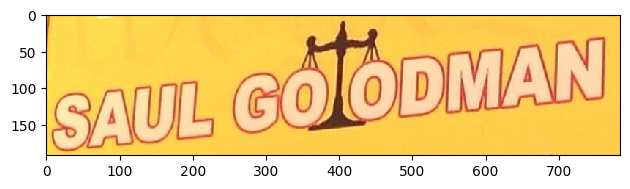

In [6]:
template1 = imread('saul-template.jpeg')
imshow(template1);

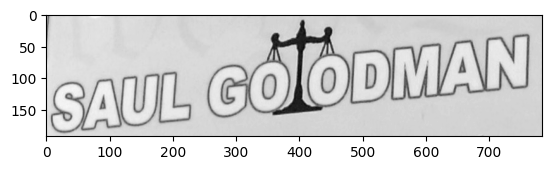

In [7]:
template_grey = rgb2gray(template1)
plt.imshow(template_grey, cmap='gray');

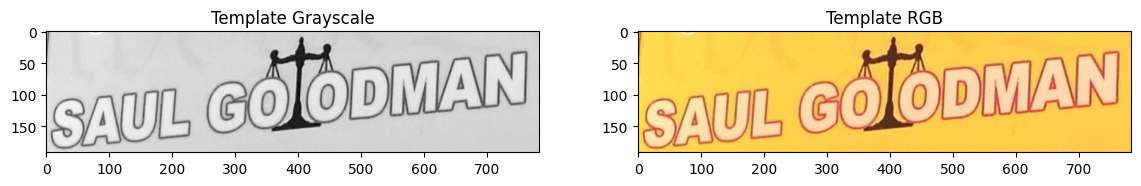

In [8]:
plt.figure(figsize = (14, 12))
plt.subplot(121)
plt.title('Template Grayscale')
plt.imshow(template_grey, cmap = 'gray')
plt.subplot(122)
plt.title('Template RGB')
plt.imshow(template1)

## Pada Citra Grayscale

In [9]:
import cv2
import matplotlib.pyplot as plt

# Membaca citra dan template
image_grey = cv2.imread('saul-ori.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = image_grey.copy()
template_grey = cv2.imread('saul-template.jpeg', cv2.IMREAD_GRAYSCALE)

# Periksa apakah citra dan template telah dibaca dengan benar
if img2 is None or template_grey is None:
    print("Gagal membaca citra atau template.")
    exit()

# Mencocokkan template
res = cv2.matchTemplate(img2, template_grey, cv2.TM_CCORR_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
w, h = template_grey.shape[::-1]

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img2, top_left, bottom_right, 255, 10)

# Menampilkan shape dan matriks
print('Matriks dari image \n', img2)
print('Dengan Shape:', img2.shape)
print('\n Matriks dari matching \n', res)
print('Dengan shape:', res.shape)


Matriks dari image 
 [[156 156 156 ... 156 157 159]
 [159 158 157 ... 155 156 157]
 [161 159 157 ... 155 155 155]
 ...
 [175 179 181 ... 181 180 183]
 [171 176 175 ... 181 181 180]
 [165 169 168 ... 181 181 180]]
Dengan Shape: (1194, 1600)

 Matriks dari matching 
 [[0.986571   0.9865648  0.98656255 ... 0.9830247  0.9829937  0.9829594 ]
 [0.9865669  0.9865629  0.9865627  ... 0.9828343  0.9828075  0.9827746 ]
 [0.9865626  0.9865601  0.9865612  ... 0.98265016 0.9826272  0.9825957 ]
 ...
 [0.9250686  0.92500013 0.9249427  ... 0.92225385 0.922309   0.92236286]
 [0.925369   0.92529607 0.9252346  ... 0.92312574 0.92318326 0.92324114]
 [0.925668   0.92559236 0.92552763 ... 0.92407626 0.9241362  0.92419815]]
Dengan shape: (1003, 817)


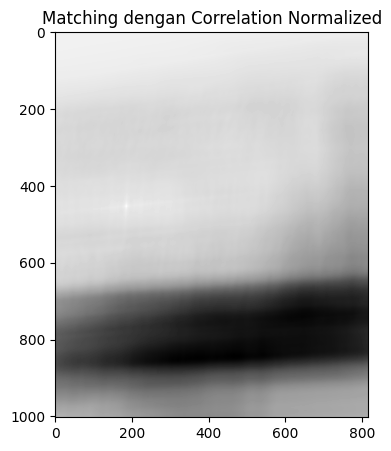

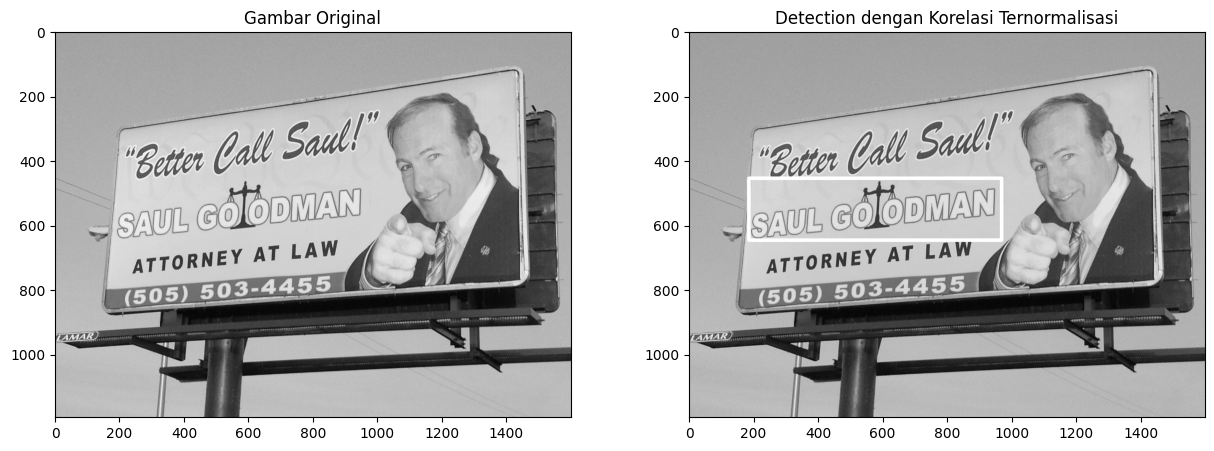

In [10]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Matching dengan Correlation Normalized')
plt.imshow(res, cmap='gray')
plt.show()

plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

plt.subplot(gs[0])
plt.title('Gambar Original')
plt.imshow(image_grey, cmap='gray')

plt.subplot(gs[1])
plt.title('Detection dengan Korelasi Ternormalisasi')
plt.imshow(img2, cmap='gray')
plt.show()

In [11]:
print('Hasil Matching Template didapat nilai korelasi ternormalisasi adalah :', max_val)

Hasil Matching Template didapat nilai korelasi ternormalisasi adalah : 0.9999820590019226


In [12]:
threshold = 0.85
if max_val >= threshold:
    print('Hasil memiliki korelasi tinggi')
else:
    print('Hasil tidak memiliki korelasi tinggi.')

Hasil memiliki korelasi tinggi


In [13]:
import cv2
import matplotlib.pyplot as plt

# Membaca citra dan template
img = cv2.imread('saul-ori.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = img.copy()
template = cv2.imread('saul-template.jpeg', cv2.IMREAD_GRAYSCALE)

# Periksa apakah citra dan template telah dibaca dengan benar
if img is None or template is None:
    print("Gagal membaca citra atau template.")
    exit()

# Mencocokkan template
res = cv2.matchTemplate(img2, template, cv2.TM_CCORR)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
w, h = template.shape[::-1]

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img2, top_left, bottom_right, 255, 10)

# Menampilkan shape dan matriks
print('Matriks dari image \n', img2)
print('Dengan Shape:', img2.shape)
print('\n Matriks dari matching \n', res)
print('Dengan shape:', res.shape)

Matriks dari image 
 [[156 156 156 ... 156 157 159]
 [159 158 157 ... 155 156 157]
 [161 159 157 ... 155 155 155]
 ...
 [175 179 181 ... 181 180 183]
 [171 176 175 ... 181 181 180]
 [165 169 168 ... 181 181 180]]
Dengan Shape: (1194, 1600)

 Matriks dari matching 
 [[4.8347720e+09 4.8348431e+09 4.8349292e+09 ... 4.9302968e+09
  4.9300716e+09 4.9298468e+09]
 [4.8357146e+09 4.8357970e+09 4.8358953e+09 ... 4.9324124e+09
  4.9322076e+09 4.9319900e+09]
 [4.8366382e+09 4.8367293e+09 4.8368343e+09 ... 4.9345106e+09
  4.9343263e+09 4.9341158e+09]
 ...
 [4.5646889e+09 4.5636874e+09 4.5627418e+09 ... 4.6459259e+09
  4.6464696e+09 4.6470031e+09]
 [4.5677404e+09 4.5667195e+09 4.5657559e+09 ... 4.6598031e+09
  4.6603771e+09 4.6609480e+09]
 [4.5707351e+09 4.5697050e+09 4.5687281e+09 ... 4.6745298e+09
  4.6751329e+09 4.6757422e+09]]
Dengan shape: (1003, 817)


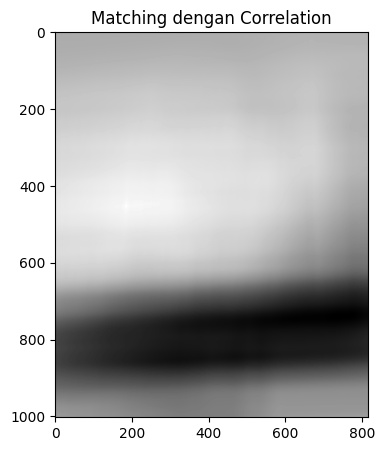

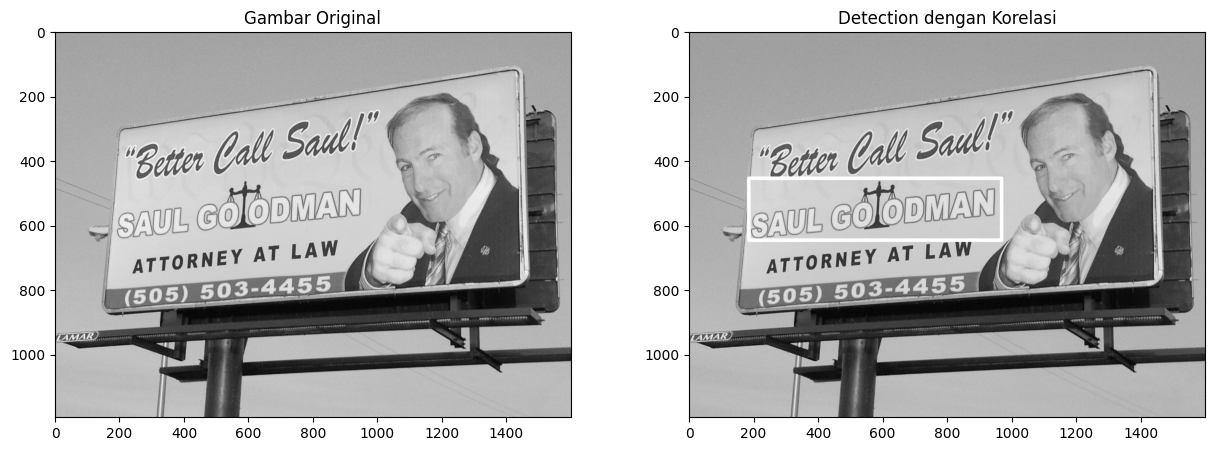

In [14]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Matching dengan Correlation')
plt.imshow(res, cmap='gray')
plt.show()

plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

plt.subplot(gs[0])
plt.title('Gambar Original')
plt.imshow(image_grey, cmap='gray')

plt.subplot(gs[1])
plt.title('Detection dengan Korelasi')
plt.imshow(img2, cmap='gray')
plt.show()

In [15]:
print('Hasil Matching Template didapat nilai korelasi ternormalisasi adalah :', max_val)

Hasil Matching Template didapat nilai korelasi ternormalisasi adalah : 6104281088.0


In [16]:
threshold = 0.85
if max_val >= threshold:
    print('Hasil memiliki korelasi tinggi')
else:
    print('Hasil tidak memiliki korelasi tinggi.')

Hasil memiliki korelasi tinggi


Hasil memiliki korelasi tinggi


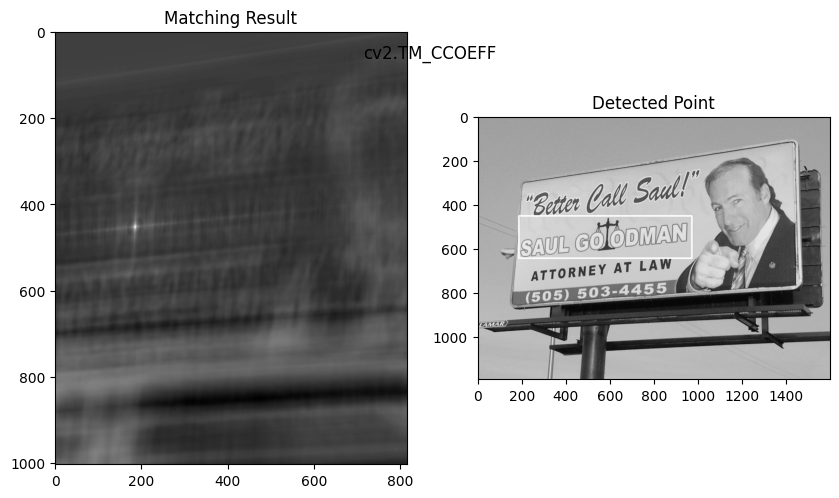

Nilai korelasi maksimum : 161092288.0
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


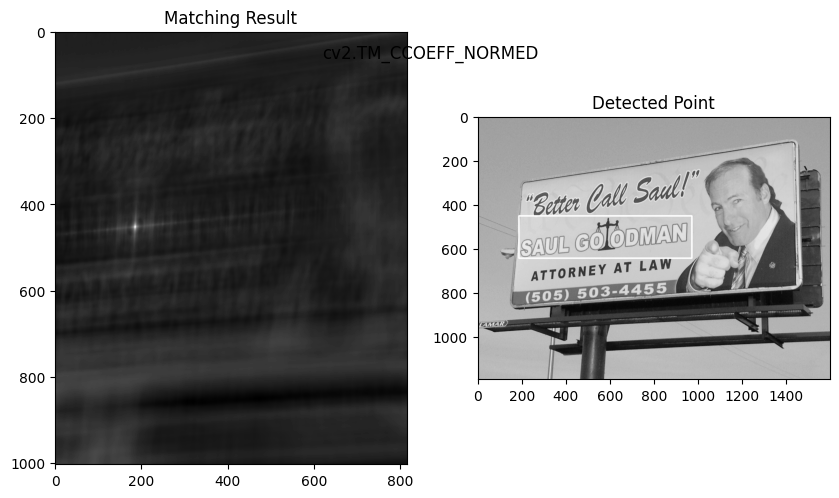

Nilai korelasi maksimum : 0.9993187785148621
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


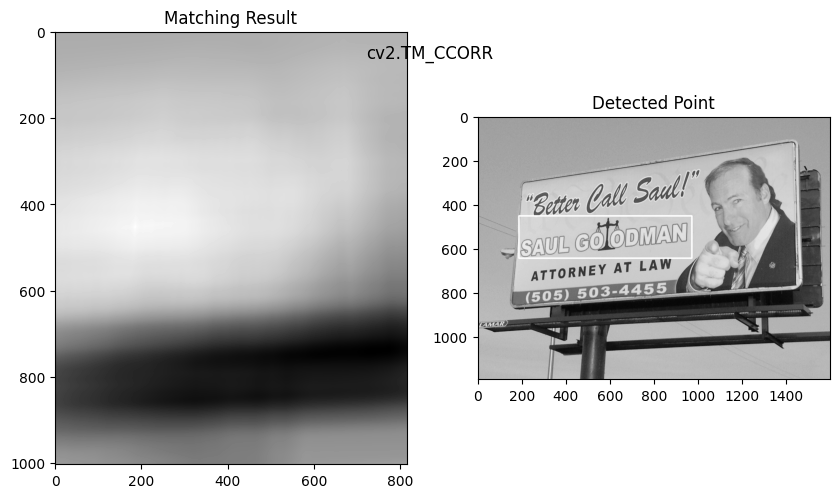

Nilai korelasi maksimum : 6104281088.0
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


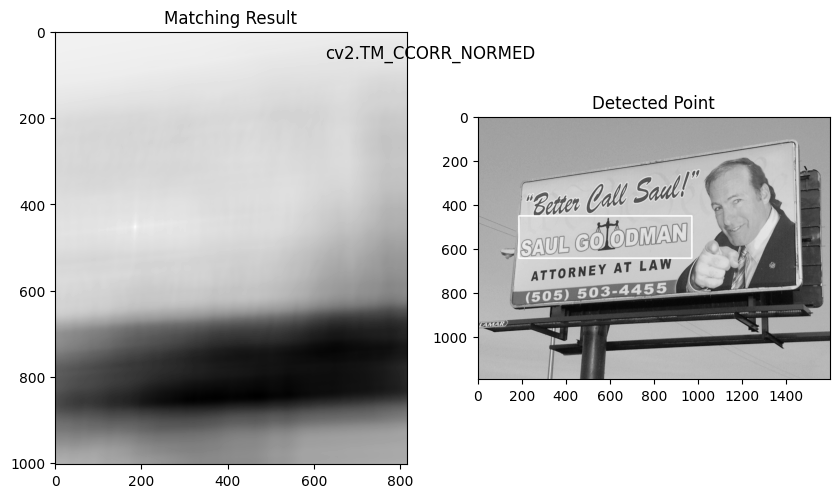

Nilai korelasi maksimum : 0.9999820590019226
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


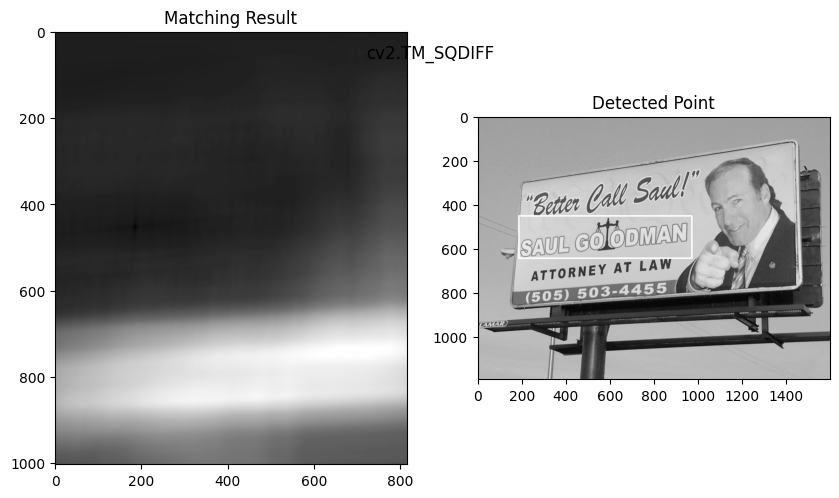

Nilai korelasi maksimum : 3003104768.0
Pada koordinat (644, 743)
Hasil memiliki korelasi tinggi


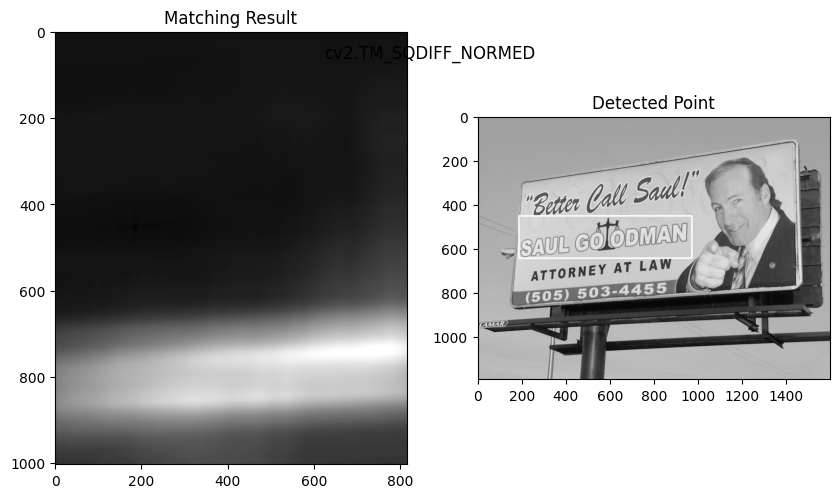

Nilai korelasi maksimum : 1.0
Pada koordinat (768, 730)


In [17]:
import cv2
import matplotlib.pyplot as plt

# Membaca citra dan template
image_grey = cv2.imread('saul-ori.jpeg', cv2.IMREAD_GRAYSCALE)
img2 = image_grey.copy()
template_grey = cv2.imread('saul-template.jpeg', cv2.IMREAD_GRAYSCALE)

# Periksa apakah citra dan template telah dibaca dengan benar
if img2 is None or template_grey is None:
    print("Gagal membaca citra atau template.")
    exit()

h, w = template_grey.shape

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for method in methods:
    img2_copy = img2.copy()
    method1 = eval(method)

    result = cv2.matchTemplate(img2_copy, template_grey, method1)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method1 in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)
    cv2.rectangle(img2_copy, location, bottom_right, 255, 5)

    plt.figure(figsize=(10, 8))
    plt.subplot(121)
    plt.imshow(result, cmap='gray')
    plt.title('Matching Result')
    plt.subplot(122)
    plt.imshow(img2_copy, cmap='gray')
    plt.title('Detected Point')
    plt.suptitle(method, y=0.75)

    # Menambahkan kondisi dari codingan pertama
    threshold = 0.85
    if max_val >= threshold:
        print('Hasil memiliki korelasi tinggi')
    else:
        print('Hasil tidak memiliki korelasi tinggi.')

    plt.show()
    print('Nilai korelasi maksimum :', max_val)
    print('Pada koordinat', max_loc)


##Pada Citra RGB semua Metode

Hasil memiliki korelasi tinggi


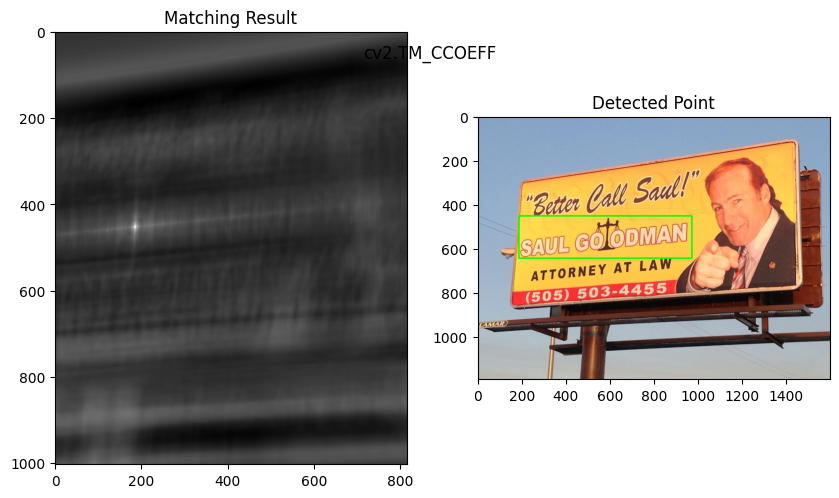

Nilai korelasi maksimum : 584365312.0
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


Nilai korelasi maksimum : 0.998518168926239
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


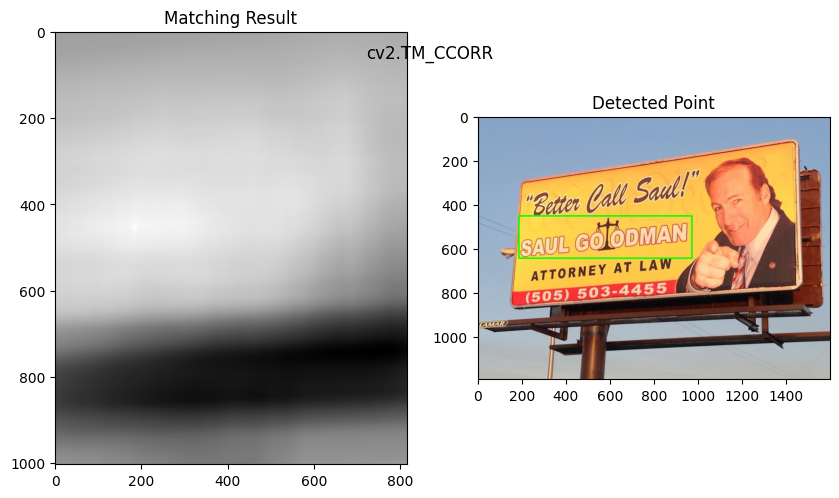

Nilai korelasi maksimum : 16682746880.0
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


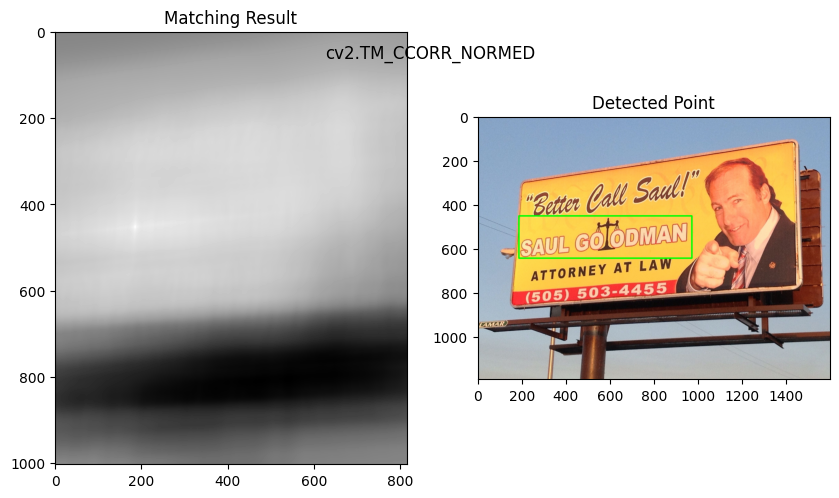

Nilai korelasi maksimum : 0.999947726726532
Pada koordinat (185, 453)
Hasil memiliki korelasi tinggi


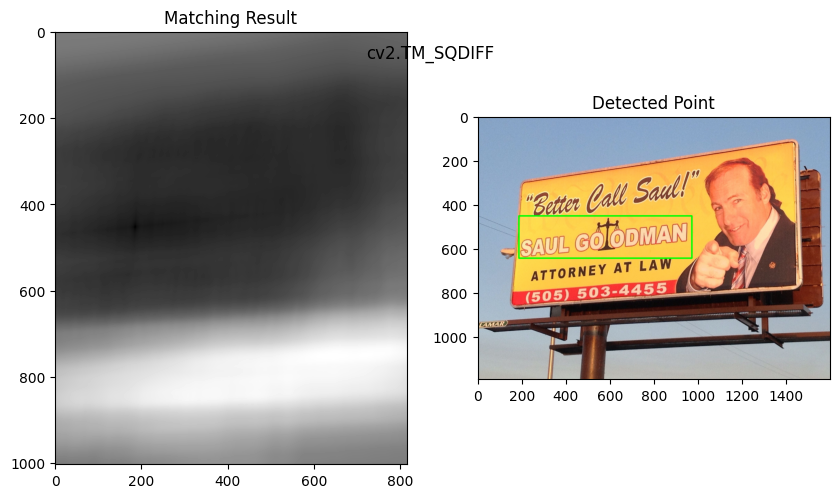

Nilai korelasi maksimum : 8379854848.0
Pada koordinat (629, 753)
Hasil memiliki korelasi tinggi


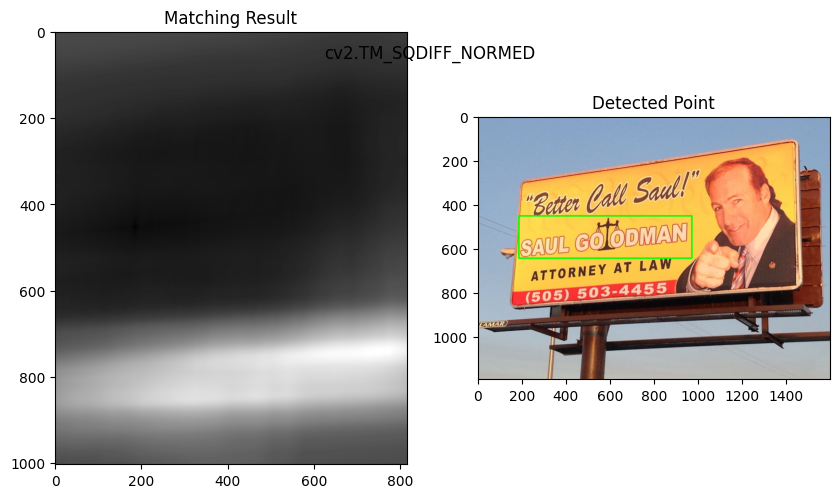

Nilai korelasi maksimum : 0.9605560302734375
Pada koordinat (733, 744)


In [18]:
import cv2
import matplotlib.pyplot as plt

# Membaca citra dan template
image = cv2.imread('saul-ori.jpeg')
img2 = image.copy()
template = cv2.imread('saul-template.jpeg')

# Periksa apakah citra dan template telah dibaca dengan benar
if img2 is None or template is None:
    print("Gagal membaca citra atau template.")
    exit()

h, w, _ = template.shape

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for method in methods:
    img2_copy = img2.copy()
    method1 = eval(method)

    result = cv2.matchTemplate(img2_copy, template, method1)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    if method1 in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        location = min_loc
    else:
        location = max_loc

    bottom_right = (location[0] + w, location[1] + h)
    cv2.rectangle(img2_copy, location, bottom_right, (0, 255, 0), 5)

    plt.figure(figsize=(10, 8))
    plt.subplot(121)
    plt.imshow(result, cmap='gray')
    plt.title('Matching Result')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img2_copy, cv2.COLOR_BGR2RGB))
    plt.title('Detected Point')
    plt.suptitle(method, y=0.75)

    # Menambahkan kondisi dari codingan pertama
    threshold = 0.85
    if max_val >= threshold:
        print('Hasil memiliki korelasi tinggi')
    else:
        print('Hasil tidak memiliki korelasi tinggi.')

    plt.show()
    print('Nilai korelasi maksimum :', max_val)
    print('Pada koordinat', max_loc)


Dari hasil diperoleh gambar template terdeteksi. Akan tetapi, ada perbedaan nilai korelasi antara grayscale dan RGB. Secara kumulatif, nilai korelasi pada grayscale menunjukkan hasil lebih baik dibanding RGB. Hal ini karena matriks grayscale lebih mudah diproses karena hanya punya 1 warna (abu-abu) sedangkan RGB 3 atau lebih gabungan warna merah, hijau, dan biru. Selain itu, menurut saya dalam RGB berlaku pula pembulatan numerik. Jadi, data korelasi yang dihasilkan banyak yang loss meski tidak signifikan.

Waktu pemrosesan antara grayscale dan RGB pun terasa. Pada RGB memerlukan waktu pemrosesan program lebih lama dibanding grayscale.